<a href="https://colab.research.google.com/github/s-ynee/colab/blob/main/load_mat_train2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

실험결과 파일(MATLAB .mat) 불러와서 데이터셋 전처리

In [ ]:
import glob
import imageio
import matplotlib.pyplot as plt
from sklearn import preprocessing
import os
import PIL
from tensorflow.keras import layers, models
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D,UpSampling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense, BatchNormalization, Activation, GaussianNoise, LSTM
from IPython import display
import numpy as np
import matplotlib.pylab as plt 
import scipy.io
import tensorflow as tf

mat_file_name_x ="x.mat"
mat_file_x = scipy.io.loadmat(mat_file_name_x)
mat_file_name_y ="y.mat"
mat_file_y = scipy.io.loadmat(mat_file_name_y)

print(type(mat_file_x))

for i in mat_file_x:
  print(i)

<class 'dict'>
__header__
__version__
__globals__
x


In [ ]:
mat_file_value_x = mat_file_x[mat_file_name_x[:-4]]

print(min(mat_file_value_x[0]))
print(max(mat_file_value_x[0]))
mat_file_value_x = (mat_file_value_x-min(mat_file_value_x[0]))/(max(mat_file_value_x[0])-min(mat_file_value_x[0]))

print("size :",len(mat_file_value_x), "X", len(mat_file_value_x[0]))
mat_file_value_y = mat_file_y[mat_file_name_y[:-4]]
print("size :",len(mat_file_value_y), "X", len(mat_file_value_y[0]))

-5.414261750151804
4.667654437273463
size : 1 X 1568
size : 1 X 1568


In [ ]:
#oversampling

x =[]
y =[]

up =2

for i in range(1568):
  for _ in range(up):
    x.append(mat_file_value_x[0][i])
    
    y.append(mat_file_value_y[0][i])
  # for _ in range(28):
  x.append(0)
  y.append(0)



In [ ]:
# x_train_img =[]
# temp_img = np.zeros((28,28,1))


# print(temp_img.shape)
# plt.imshow(temp_img[:,:,0])


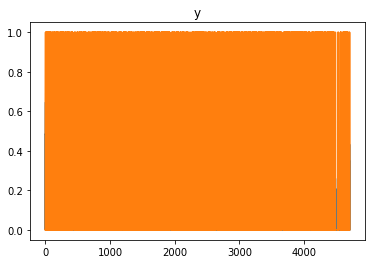

In [ ]:
mat_file_x =[]
mat_file_y =[]
for i in range(0,len(x)):
  mat_file_x = np.append(mat_file_x,i)
  mat_file_y = np.append(mat_file_y,i)


plt.title(mat_file_name_x[:-4])
plt.plot(mat_file_x, x)
plt.title(mat_file_name_y[:-4])
plt.plot(mat_file_y, y)
plt.show()

In [ ]:
alpha = int(len(x)/28/28)
x_arr = np.array(x)
x_reshaped = x_arr.reshape(alpha, 28, 28, 1)
print(x_reshaped.shape)
# mean = 4.67, var = 3.83

y_arr = np.array(y)
y_reshaped = y_arr.reshape(alpha, 28, 28, 1)
print(y_reshaped.shape)

(6, 28, 28, 1)
(6, 28, 28, 1)


**  데이터 나누기**

In [ ]:


train_rate = 0.6

n_train = int(alpha * train_rate)
n_test = int(alpha * (1 - train_rate))
print(n_train)
print(n_test)
x_train = x_reshaped[0: n_train]
x_test = x_reshaped[n_train:]

y_train = y_reshaped[0: n_train]
y_test = y_reshaped[n_train:]

print(x_train.shape)
print(x_test.shape)

3
2
(3, 28, 28, 1)
(3, 28, 28, 1)


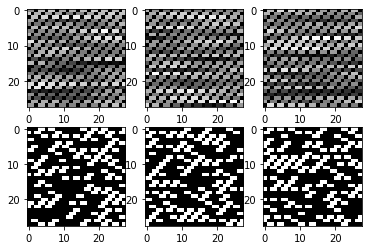

In [ ]:
# plt.subplot(1,3,1), plt.imshow(x_reshaped[0, :, :, 0],cmap='gray')
# plt.subplot(1,3,2), plt.imshow(x_train[0, :, :, 0],cmap='gray')
# plt.subplot(1,3,3), plt.imshow(x_test[0, :, :, 0],cmap='gray')


for i in range(0, n_train):
  plt.subplot(2,n_train,i+1), plt.imshow(x_train[i, :, :, 0],cmap='gray')
  plt.subplot(2,n_train,n_train+i+1), plt.imshow(y_train[i, :, :, 0],cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f26e74ee990>,
 <matplotlib.image.AxesImage at 0x7f26e71cca50>)

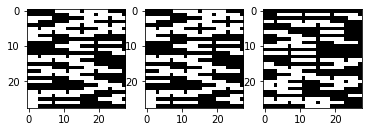

In [ ]:
# plt.subplot(1,3,1), plt.imshow(y_reshaped[0, :, :, 0],cmap='gray')
# plt.subplot(1,3,2), plt.imshow(y_train[0, :, :, 0],cmap='gray')
# plt.subplot(1,3,3), plt.imshow(y_test[0, :, :, 0],cmap='gray')

In [ ]:
BUFFER_SIZE = alpha
print(alpha)
BATCH_SIZE = 256

train_dataset = tf.data.Dataset.from_tensor_slices(x_reshaped).batch(BATCH_SIZE)

8
